## 1.1


In [1]:
import csv
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
    headers = ['item', 'country', 'year', 'sales']
    path_csv = f'./sales.csv'
    with open(path_csv,'a+', newline='') as csvfile:
        spawnrow = csv.DictWriter(csvfile, fieldnames=headers)
        spawnrow.writeheader()
    with open(f'./sales.json') as f:
        tmp = json.load(f)
    with open(path_csv, 'a+', newline='') as csvfile:
        spawnrow = csv.DictWriter(csvfile, fieldnames=headers)
        for item in tmp:
            countrys = item["sales_by_country"]
            for country in countrys:
                years = countrys[country]
                for year in years:
                    spawnrow.writerow(
                        {'item': f'{item["item"]}', 'country': f'{country}',
                         'year': f'{year}', 'sales': f'{years[year]}'})


## 2.1 Вычислить функцию:

In [3]:
x = [2,54,2]
w = [4,5,2]
b = -3
np.dot(x,w) + b

279

## 2.2  На отрезке [-5;5] построить графики функций

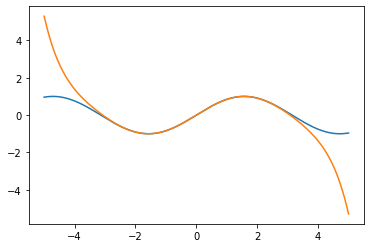

In [4]:
    x = np.linspace(-5, 5,10000)
    plt.plot(x,np.sin(x))
    plt.plot(x,x - x ** 3 / 6 + x ** 5 /120 - x ** 7 / 5040)

## 2.3 Нарисовать в matplotlib окружность заданного радиуса r.

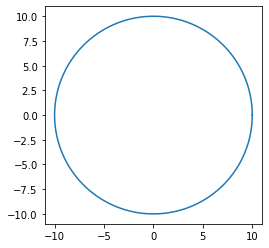

In [5]:
    r = 10
    theta = np.linspace(0, 2 * np.pi, 10000)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    plt.plot(x, y)
    plt.gca().set_aspect('equal')

## 2.4 Написать функцию transformation_plot, принимающую на вход набор двумерных точек и квадратную матрицу размером 2x2


In [6]:
def transformation_plot(matrix,quadramatrix):
    newpoints = np.dot(matrix,quadramatrix.T)
    colors = iter(cm.rainbow(np.linspace(0, 1, newpoints.shape[0])))
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    ax[0].scatter(matrix[:,0], matrix[:,1], c= matrix[:,1] * matrix[:,0] )
    ax[1].scatter(newpoints[:,0],newpoints[:,1], c= newpoints[:,0] * newpoints[:,1])

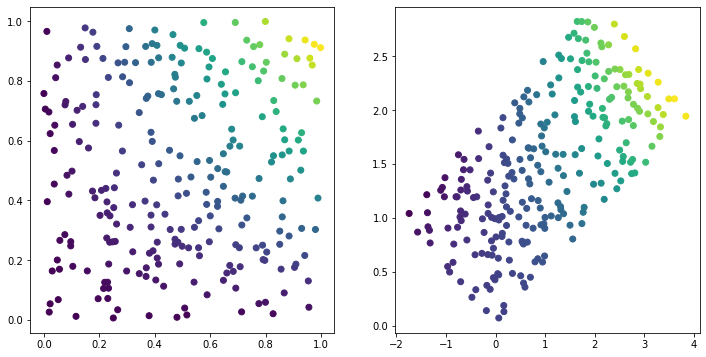

In [7]:
transformation_plot(np.random.random(size=(256, 2)), np.array([[-2,4],[1,2]]))

## 2.5 Отрисуйте график её производной на выбранном интервале [a,b], не используя её аналитическое выражение

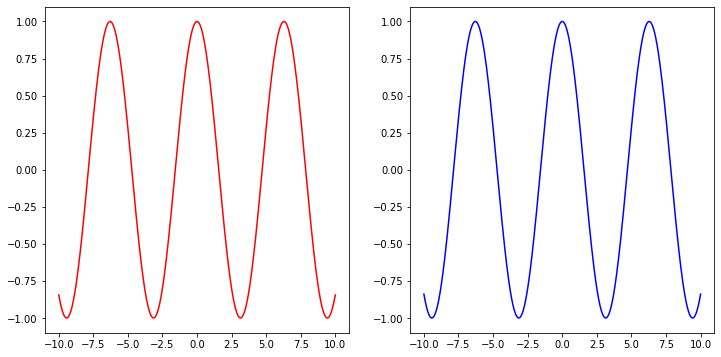

In [8]:
    x = np.linspace(-10,10,1000)
    dx = x[1] - x[0]
    y = np.sin(x)
    dy = np.gradient(y,dx)
    ax, fig = plt.subplots(1,2,figsize=(12,6))
    fig[0].plot(x,dy,label = 'Производная изначальная функция', color = 'red')
    fig[1].plot(x,np.cos(x) ,label = 'Аналитическое выражеие',color = 'blue')

## 2.6 Определить пропорцию векторов v в V, для которых угол(v,q) < 90/30 градусов

In [9]:
    listV = np.random.random(size=(150, 2)) - 0.5
    q = np.array([3,1])
    angles = np.arccos(np.dot(listV,q) / np.linalg.norm(q) / np.linalg.norm(listV,axis=1))*180/np.pi
    print('below 90:', 
      (angles < 90).sum()/len(listV))
    print('below 30:', 
      (angles < 30).sum()/len(listV))

below 90: 0.47333333333333333
below 30: 0.13333333333333333
